In [289]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from collections import Counter
import networkx as nx
import os

### Functions

In [290]:
def generate_1D(wealth_pop, Timesteps, Timeshots=[]):
    wealth_timeshots = []
    neighbours = [-1,1]
    fraction = np.random.rand(Timesteps) # fraction at each step to assign money
    for step in range(Timesteps):  
        position = np.argmin(wealth_pop)
        next_position = position + random.choice(neighbours)
        if next_position == len(wealth_pop):
            next_position = 0
        if next_position == -1:
            next_position = len(wealth_pop)-1
        sum_money = wealth_pop[position] + wealth_pop[next_position]
        e = fraction[step]
        wealth_pop[position] = sum_money*e
        wealth_pop[next_position] = sum_money*(1-e)
        if step in Timeshots:
            wealth_timeshots.append(wealth_pop)
    return [wealth_pop,wealth_timeshots]

In [291]:
def lorenz_curve(wealth_pop):
    sort_wealth = np.sort(wealth_pop)
    wealth_lorenz = sort_wealth.cumsum()/sort_wealth.sum()
    plt.figure(figsize=(6,6))
    plt.scatter(np.arange(wealth_lorenz.size), wealth_lorenz, 
                marker='x', color='coral', s=50)
    plt.plot([0,len(wealth_pop)], [0,1], color='k')
    plt.xlabel('Number of individuls',fontsize=12, weight='bold')
    plt.ylabel('Cumulative wealth',fontsize=12, weight='bold')
    plt.title("Lorenz Curve of the population", fontsize=12, weight='bold')
    plt.show()

In [323]:
def longtail_hist(final_wealth,savestr=False):
    plt.hist(final_wealth,bins=60,color='crimson', density=True, )
    plt.xlabel('Individuals Wealth',fontsize=12, weight='bold')
    plt.ylabel('Frequncy',fontsize=12, weight='bold')
    plt.title('Histogram of Wealth',fontsize=12, weight='bold')
    plt.tight_layout()
    if savestr:
        if not os.path.exists('Plots'):
            os.mkdir('Plots')
        plt.savefig(f'Plots/hist_{savestr}', dpi=200)
    plt.show()

In [293]:
def rank_size(final_wealth, start_per=0, end_per=1):
    start = int(len(final_wealth) * start_per)
    end = int(len(final_wealth) * end_per)
    Y = -np.sort(-final_wealth)[start:end] 
    X = np.arange(start,end)+1
    plt.loglog(X,Y,'o', markersize=3.0)
    plt.xlabel('Log rank',fontsize=12, weight='bold')
    plt.ylabel('Log size',fontsize=12, weight='bold')
    plt.title('Log-log of individual wealth (descending order)',fontsize=12, weight='bold')

In [294]:
def cumuper_people(final_wealth):
        sort_dewealth = -np.sort(-final_wealth)
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.scatter(sort_dewealth,cumuper_people, color='chartreuse')
        plt.xlabel('Wealth',fontsize=12, weight='bold')
        plt.ylabel('Cumulative precentile of people',fontsize=12, weight='bold')
        plt.title('Cumulative percentile of people with decreasing wealth',
                  fontsize=12, weight='bold')        
        plt.subplot(122)
        plt.loglog(sort_dewealth,cumuper_people,'o', markersize=3,color='chartreuse')
        plt.xlabel('log(wealth)',fontsize=12, weight='bold')
        plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
        plt.title('Log-log cumulative percentile',
                  fontsize=12, weight='bold')

In [295]:
def loglog_top(final_wealth,percentile=0.1):
        sort_dewealth = -np.sort(-final_wealth)
        sort_dewealth = sort_dewealth[:int(len(final_wealth)*percentile)]
        percentile_people = np.array(list(Counter(sort_dewealth).values()))
        cumuper_people = percentile_people.cumsum()/len(final_wealth)
        plt.figure(figsize=(6,6))
        plt.loglog(sort_dewealth,cumuper_people,'o', markersize=3,color='violet')
        plt.xlabel('log(wealth)',fontsize=12, weight='bold')
        plt.ylabel('Log(cumulative percentile)',fontsize=12, weight='bold')
        plt.title('Log-log cumulative percentile',
                  fontsize=12, weight='bold')

In [296]:
def heatmap(G2d, ax1, ax2, dirName='heatmap', step=0):
    nodes = list(G2d.nodes(data='wealth'))
    heatmap = np.full((ax1, ax2), 0)
    for node in nodes:
        heatmap[node[0]] = node[1]
    plt.imshow(heatmap)
    plt.clim(0,1200)
    plt.colorbar(label='Wealth')
    if not os.path.exists(dirName):
        os.mkdir(dirName)
    stepstr = str(step).zfill(10)
    plt.savefig(f'{dirName}/{stepstr}')
    plt.show()

In [297]:
def transcations(G2d,Steps,dirName='heatmap', plotevery=10):
    fraction = np.random.rand(Steps) 
    for step in range(Steps):
        min_wealth = 1000
        min_position = np.zeros(1)
        for key,values in G2d.nodes.data():
            if values['wealth'] < min_wealth:
                min_wealth = values['wealth']
                min_position = key
            
        neighbours = list((dict(G2d.adj[min_position]).keys()))
        neigh_list = np.arange(len(neighbours))
        neigh_position = neighbours[np.random.choice(neigh_list)]
        e = fraction[step]
        sum_wealth = G2d.nodes[min_position]['wealth']+ G2d.nodes[neigh_position]['wealth']
        G2d.nodes[min_position]['wealth'] = sum_wealth*e
        G2d.nodes[neigh_position]['wealth'] = sum_wealth*(1-e)
        if step % plotevery == 0:
            heatmap(G2d, ax1, ax2, dirName, step=step)
    return G2d

### Initialize array

In [329]:
Number = 1000
Steps = 1000000
initial_wealth = 1000*np.random.rand(Number) # initialize the wealth at time 0.

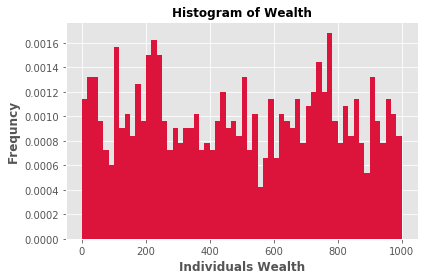

In [330]:
longtail_hist(initial_wealth, 'initial')

In [326]:
final_wealth = generate_1D(initial_wealth,Steps)[0]

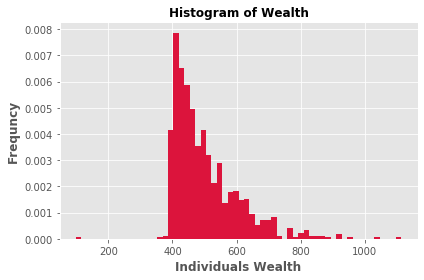

In [327]:
longtail_hist(final_wealth, 'final')

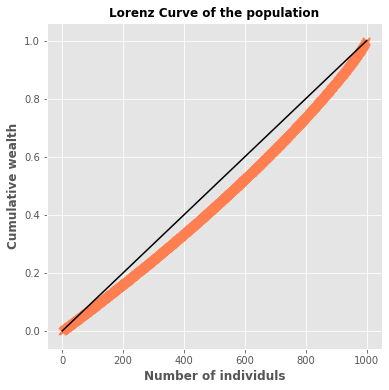

In [22]:
lorenz_curve(final_wealth)

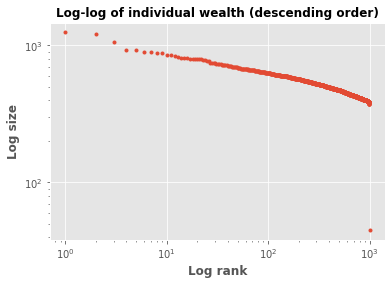

In [23]:
rank_size(final_wealth);

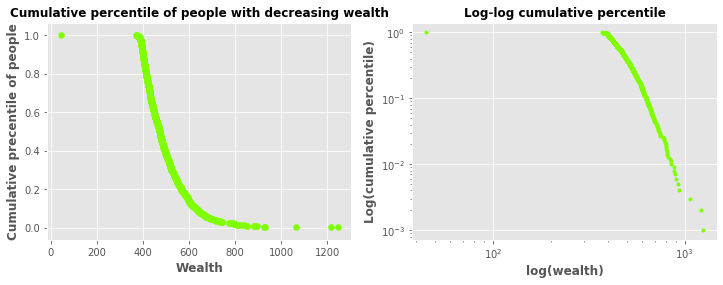

In [24]:
cumuper_people(final_wealth)

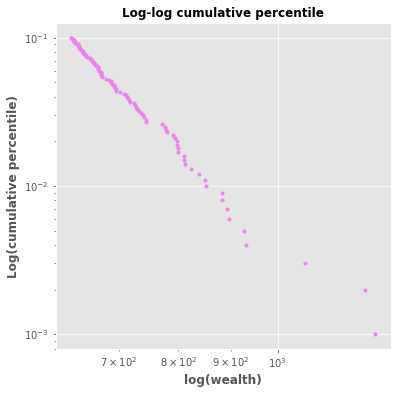

In [25]:
loglog_top(final_wealth)

### Create GIF from 2D minimal wealth model 

In [286]:
import glob
from PIL import Image

# filepaths
fp_in = "test_heatmap/*.png"
fp_out = "test_heatmap/test.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

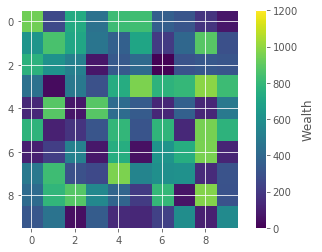

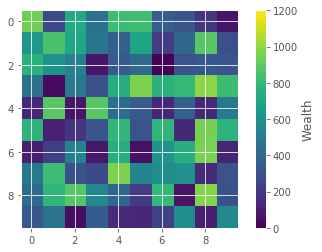

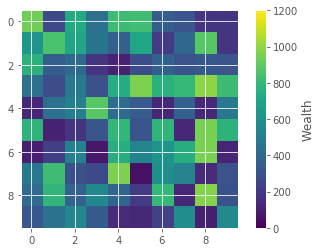

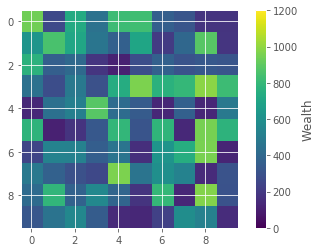

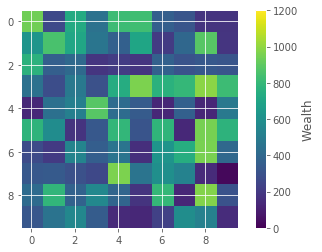

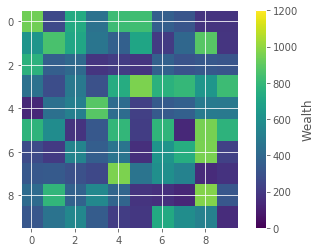

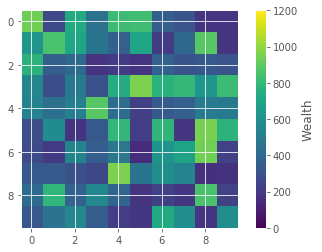

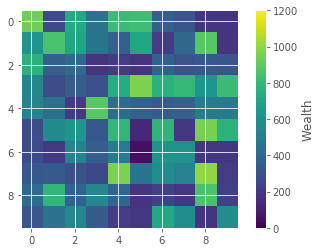

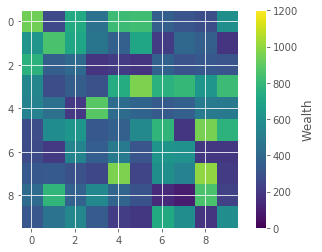

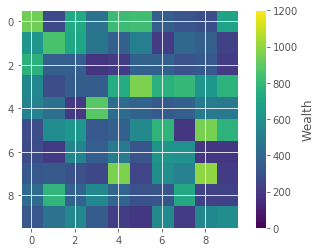

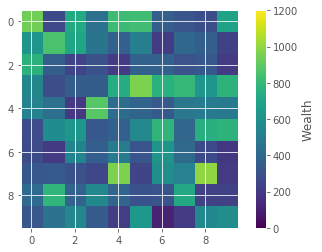

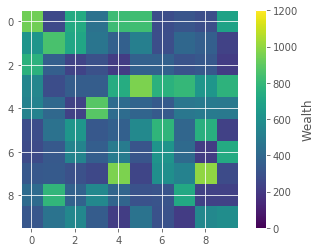

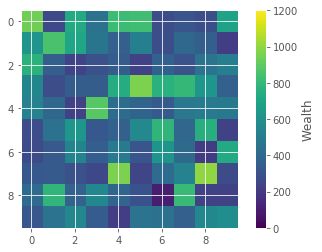

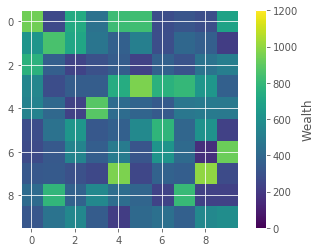

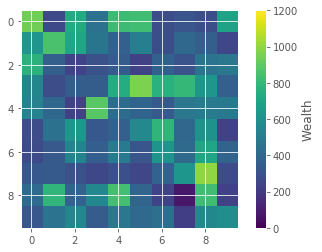

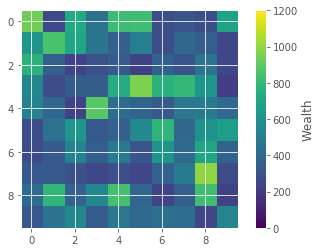

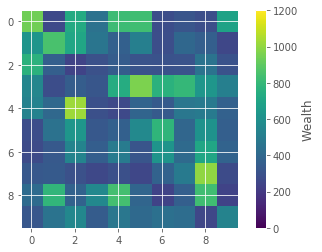

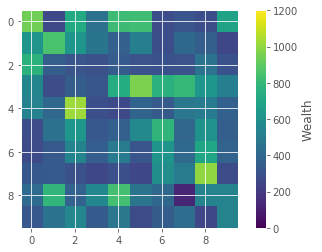

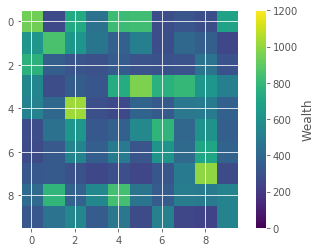

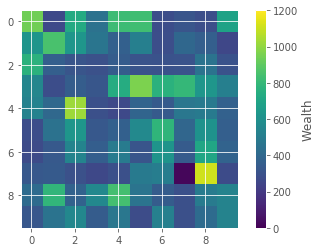

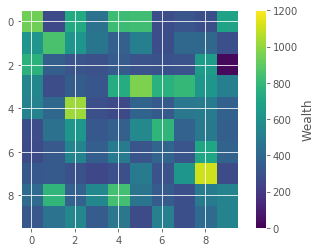

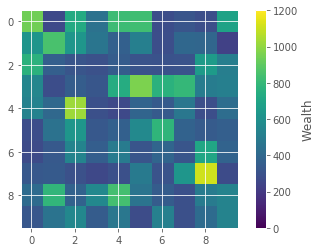

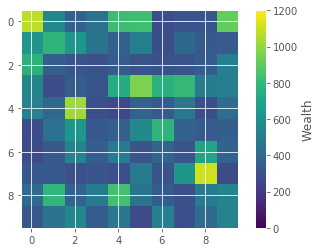

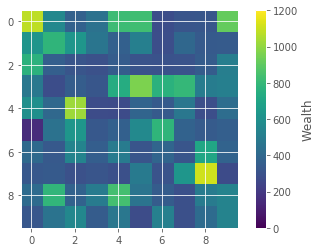

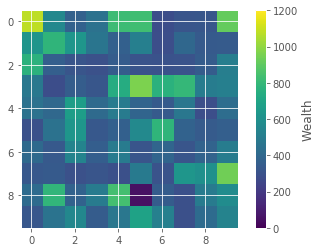

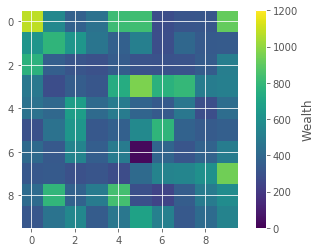

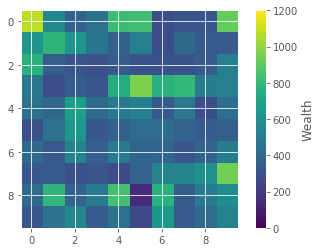

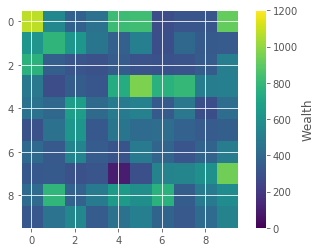

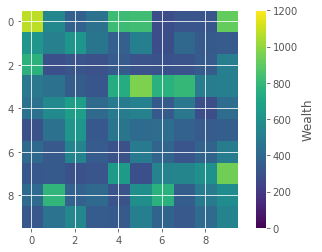

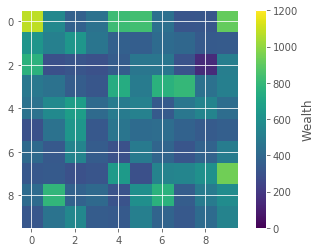

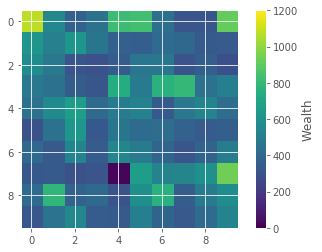

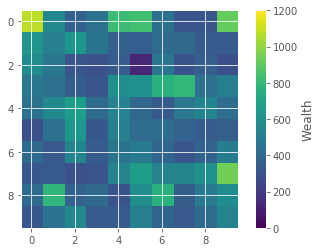

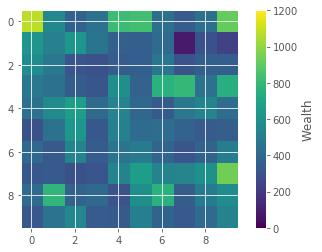

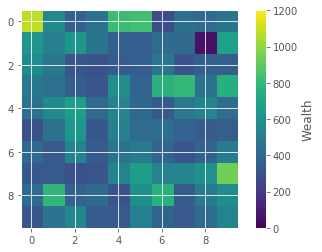

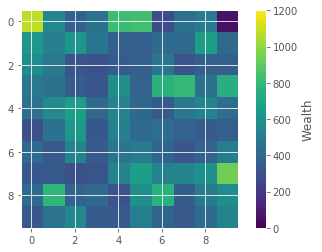

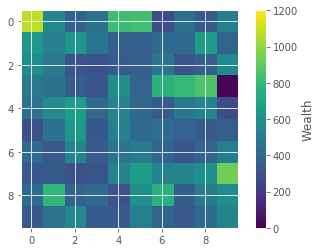

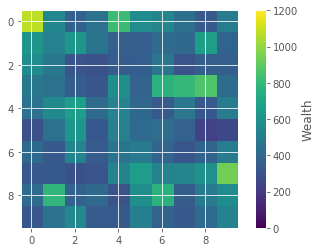

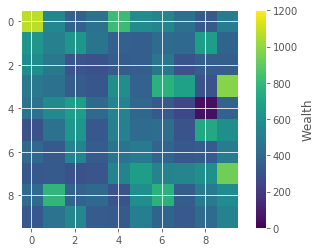

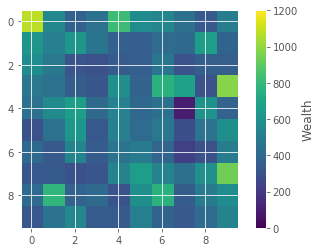

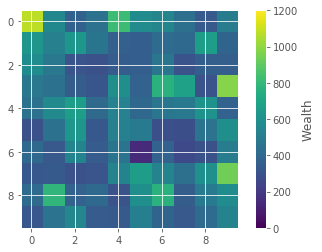

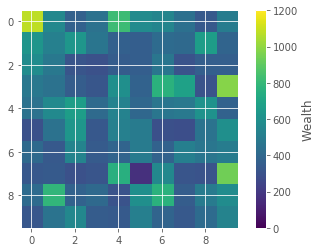

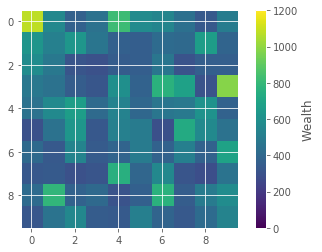

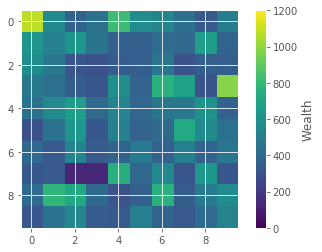

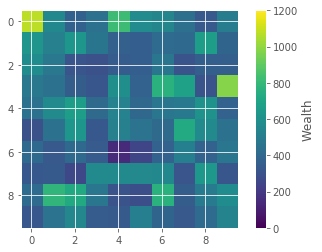

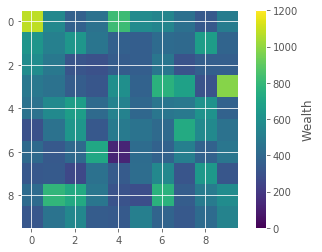

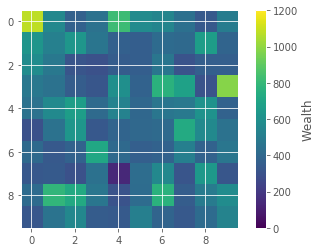

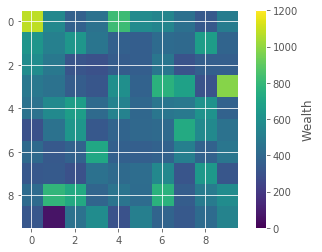

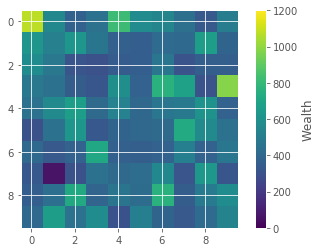

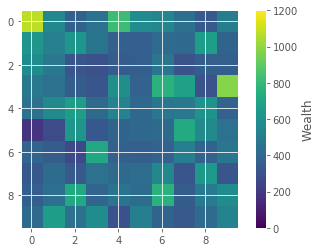

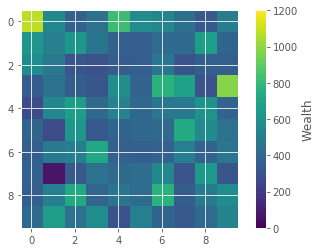

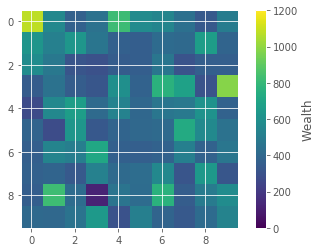

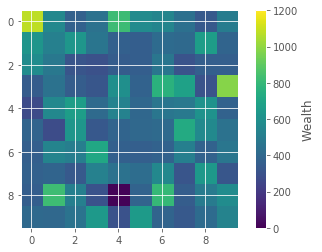

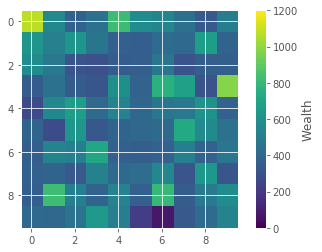

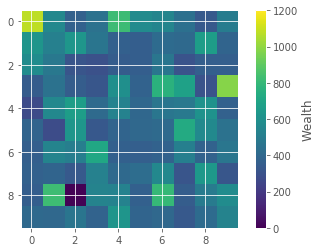

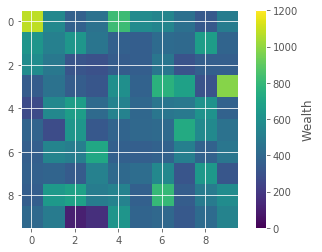

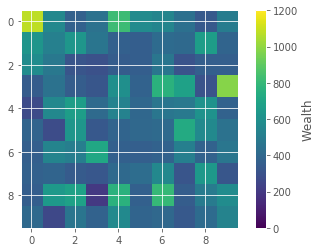

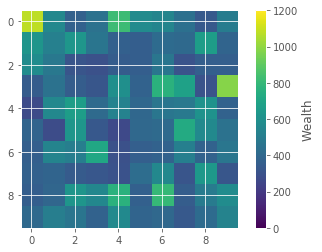

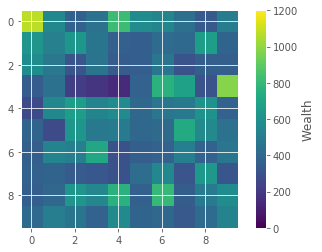

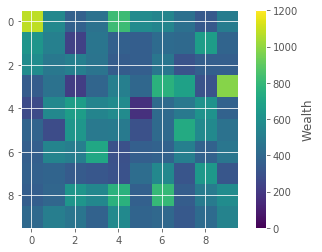

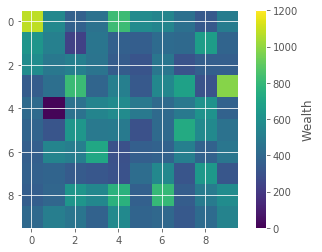

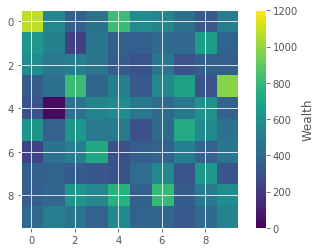

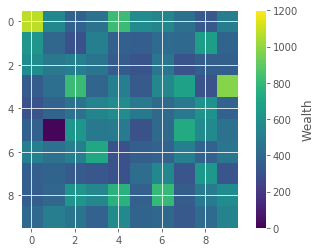

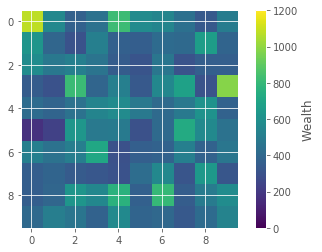

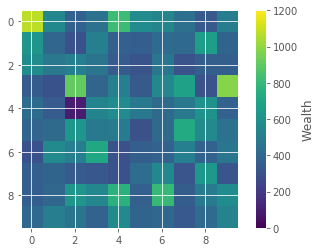

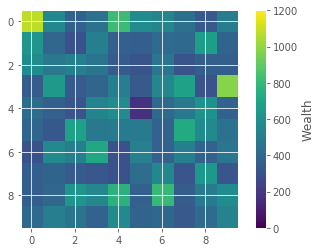

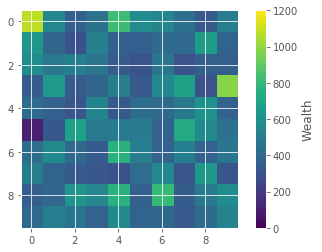

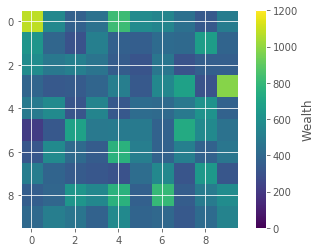

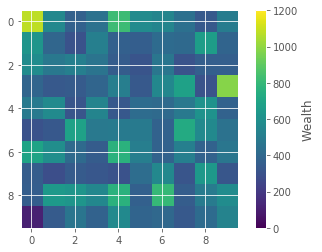

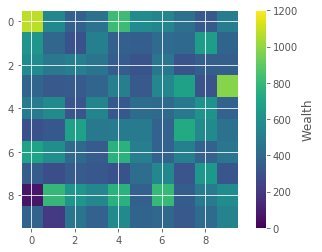

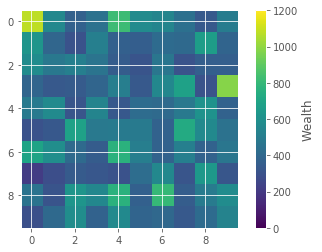

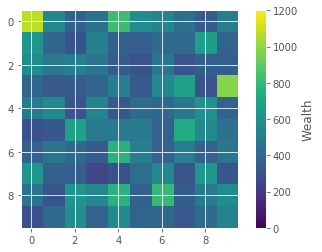

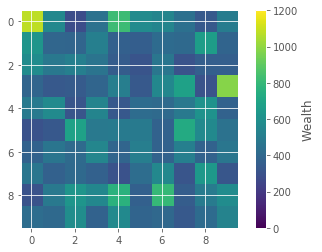

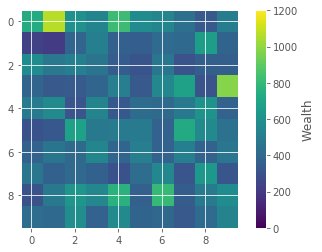

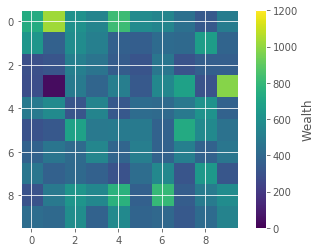

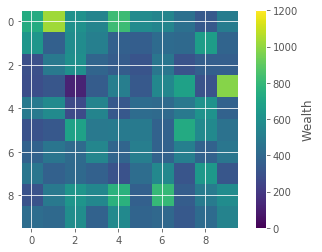

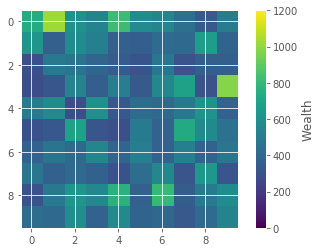

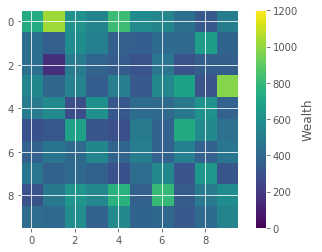

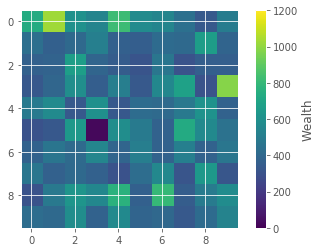

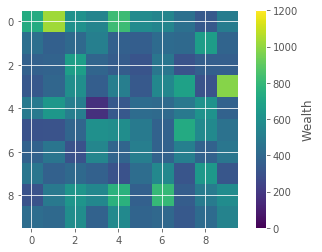

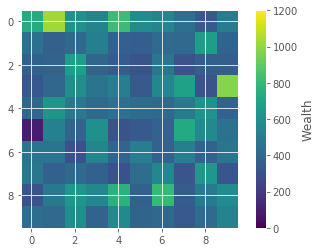

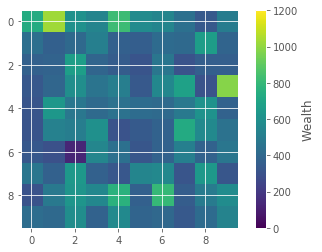

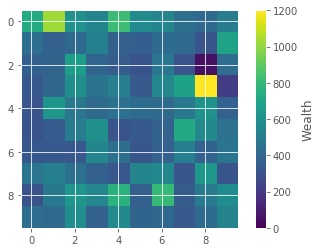

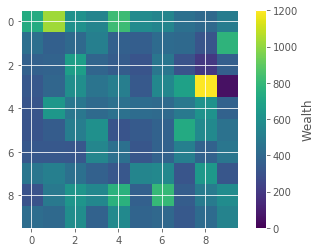

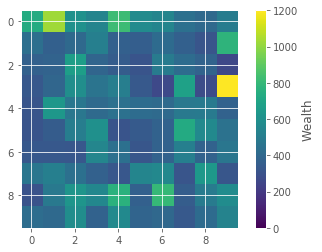

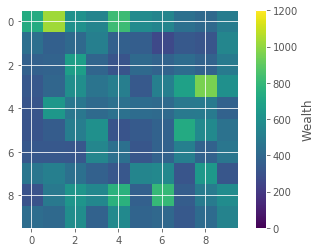

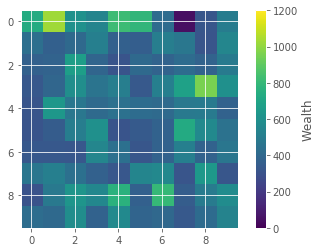

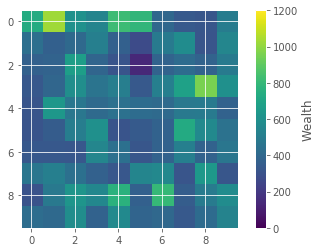

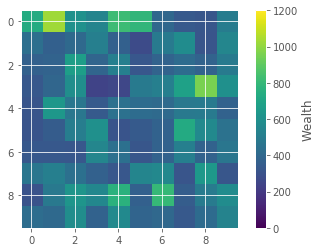

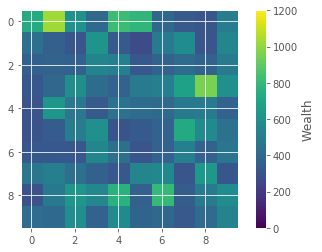

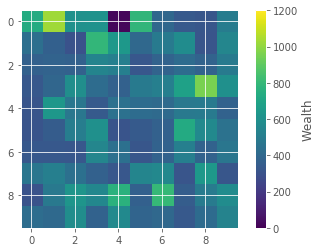

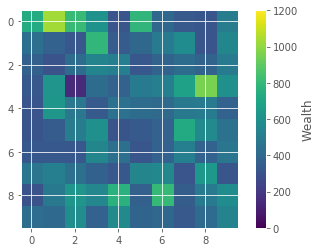

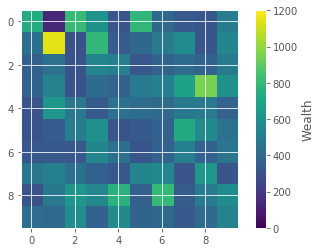

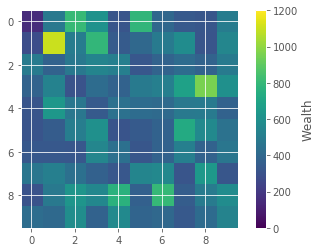

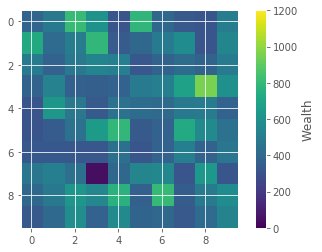

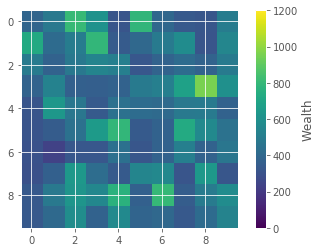

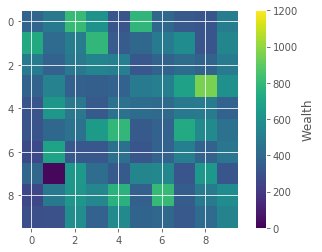

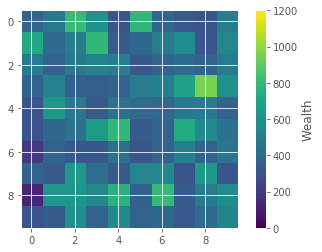

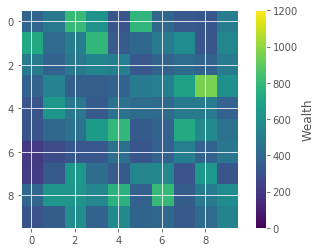

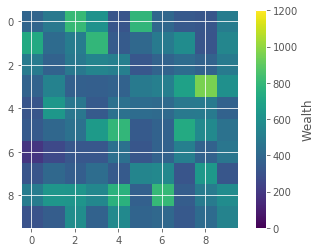

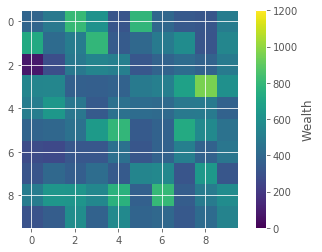

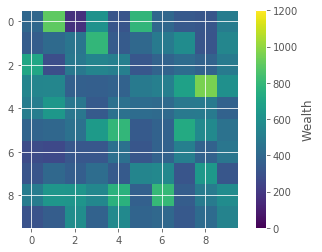

In [285]:
ax1 = 10
ax2 = 10
Number = ax1*ax2
G2d = nx.grid_2d_graph(ax1,ax2)
initial_wealth = 1000*np.random.rand(Number)
for index, node in enumerate(G2d.nodes()):
    G2d.nodes[node]['wealth']= initial_wealth[index]
heatmap(G2d, ax1, ax2)
Steps = 1000
final_G2d = transcations(G2d,Steps, 'test_heatmap')

In [30]:
final_wealth_list = list(dict(final_G2d.nodes.data()).values())

In [31]:
final_wealth2d = np.array([x['wealth'] for x in final_wealth_list])

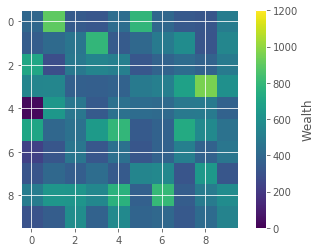

In [288]:
heatmap(final_G2d, ax1, ax2)

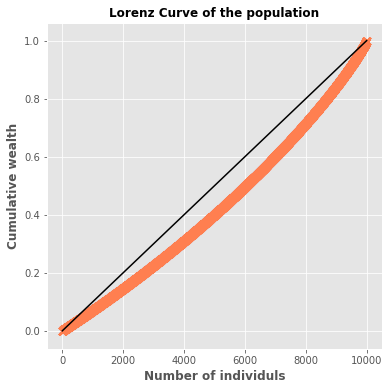

In [32]:
lorenz_curve(final_wealth2d)

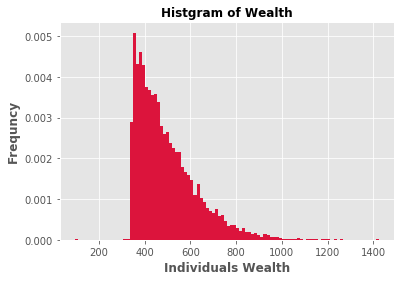

In [33]:
longtail_hist(final_wealth2d)

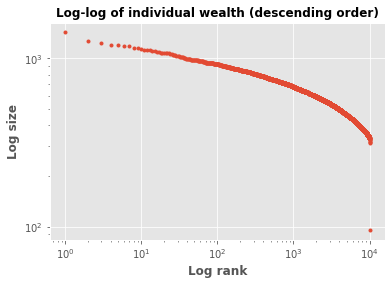

In [34]:
rank_size(final_wealth2d)

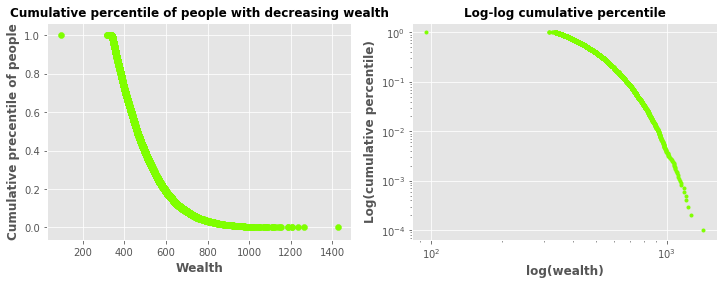

In [35]:
cumuper_people(final_wealth2d)

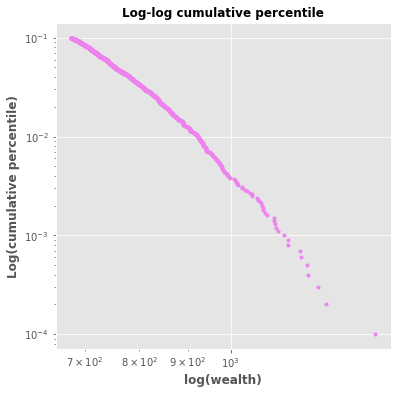

In [36]:
loglog_top(final_wealth2d,percentile=0.1)

### Networks

In [125]:
def transcations_nw(nw, n_steps):
    fractions = np.random.rand(n_steps) 
    for step in range(n_steps):        
        wealth = np.array(list(zip(*list(nw.nodes(data='wealth'))))[1])
        min_position = np.argmin(wealth)
        min_wealth = wealth[min_position]
        neighbours = list(rand_nw.neighbors(min_position))        
        neigh_position = random.choice(neighbours)
        e = fractions[step]
        sum_wealth = nw.nodes[min_position]['wealth']+nw.nodes[neigh_position]['wealth']
        nw.nodes[min_position]['wealth'] = sum_wealth*e
        nw.nodes[neigh_position]['wealth'] = sum_wealth*(1-e)
    return nw

In [176]:
def degree_wealth_plot(nw):
    wealth = np.array(list(zip(*list(nw.nodes(data='wealth'))))[1])
    degree = np.array(list(zip(*list(nw.degree())))[1])
    df = pd.DataFrame([wealth, degree]).T
    df.columns =['Wealth', 'Degree']
    avg = df.groupby('Degree').mean()
    plt.plot(avg)
    plt.xlabel('Degree')
    plt.ylabel('Average Wealth')
    plt.show()

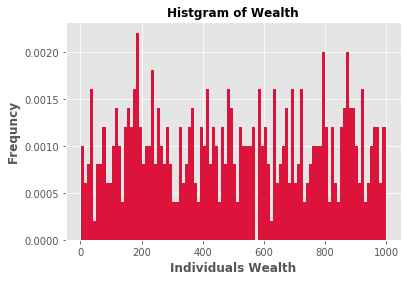

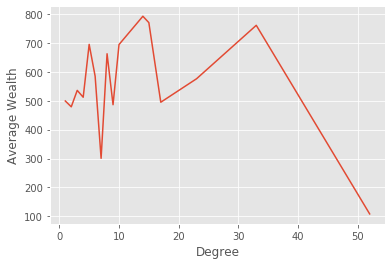

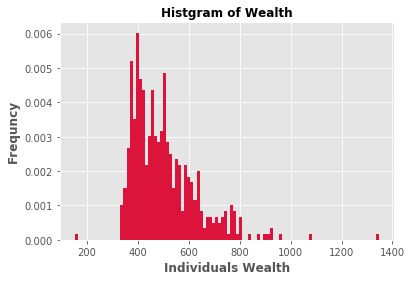

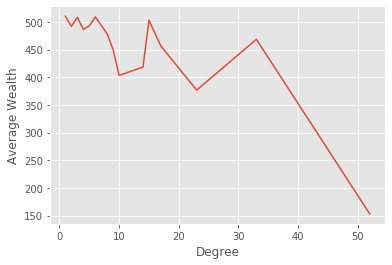

Wall time: 1min 49s


In [188]:
%%time
N = 500
n_steps = 1000000
# k = 2
# p = 0.01
m = 1
# rand_nw = nx.gnp_random_graph(N, p)
# rand_nw = nx.watts_strogatz_graph(N, k, p)
rand_nw = nx.barabasi_albert_graph(N, m)

initial_wealth = 1000*np.random.rand(N)
for index, node in enumerate(rand_nw.nodes()):
    rand_nw.nodes[node]['wealth']= initial_wealth[index]

longtail_hist(initial_wealth)
# lorenz_curve(rand_nw)
degree_wealth_plot(rand_nw)

final_nw = transcations_nw(rand_nw, n_steps)
final_wealth_list = np.array(list(zip(*list(final_nw.nodes(data='wealth'))))[1])

longtail_hist(final_wealth_list)
degree_wealth_plot(final_nw)
# lorenz_curve(final_nw)